In [3]:
import reeds
import pygromos

import numpy as np

In [51]:
import matplotlib.pyplot as plt

def plot_mbar_convergence(time, mbar_convergence, num_states, state_labels, GSKcomplex=False):

    ncols = 4
    nrows = int(num_states/5) + (num_states % 5 > 0)

    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=[4*ncols, 4*nrows])
    
    for i, ax in enumerate(axes.ravel()):
        if i == num_states: break

        # Here i will be the state 
        ax.set_title(r'Converg. $\Delta{}G$ '+ state_labels[i] + r' $\rightarrow{}$ R', fontsize=18)

        #print (mbar_convergence[k].T[i])
        for k in range(5):
            # for all seeds
            ax.plot(time, mbar_convergence[k].T[i], lw = 1)
        
        mean_seeds = np.mean(mbar_convergence, axis=0)
        
        if i == 1 and GSKcomplex:
            mean_seeds = np.mean(mbar_convergence[[0, 1, 3, 4]], axis=0)

        ax.plot(time, mean_seeds.T[i], lw =3, color='black')
        
        ax.set_ylim([mean_seeds.T[i][-1]-8.4, mean_seeds.T[i][-1]+8.4])
        
        ax.set_xlabel('time [ns]', fontsize = 18)
        ax.set_ylabel(r'$\Delta{}G$ [kJ/mol]', fontsize = 18)
        ax.tick_params(axis='both', which='major', labelsize=18)
        
        if GSKcomplex:
            ax.set_xticks(np.linspace(0, 10, 11)[::2])
        else:
            ax.set_xticks(np.arange(6))
        
        # Formatting
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.5)

        ax.tick_params(axis="y",direction="in", length = 6, width = 1.5, labelsize=18)
        ax.tick_params(axis="x",direction="in", length = 6, width = 1.5, labelsize=18)
    
    fig.tight_layout()

    return fig

### Load data for FXa in complex

In [57]:
time = np.linspace(0.5, 5, 10)

state_labels = ['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b']

convergence_data = np.zeros([5, 10, 16])
final_data = np.zeros([5, 16])
out_dir = '../data/FXA/complex'
for i in range(5):
    convergence_data[i]=np.load(f'{out_dir}/deltaGs_convergence_seed{i+1}.npy')

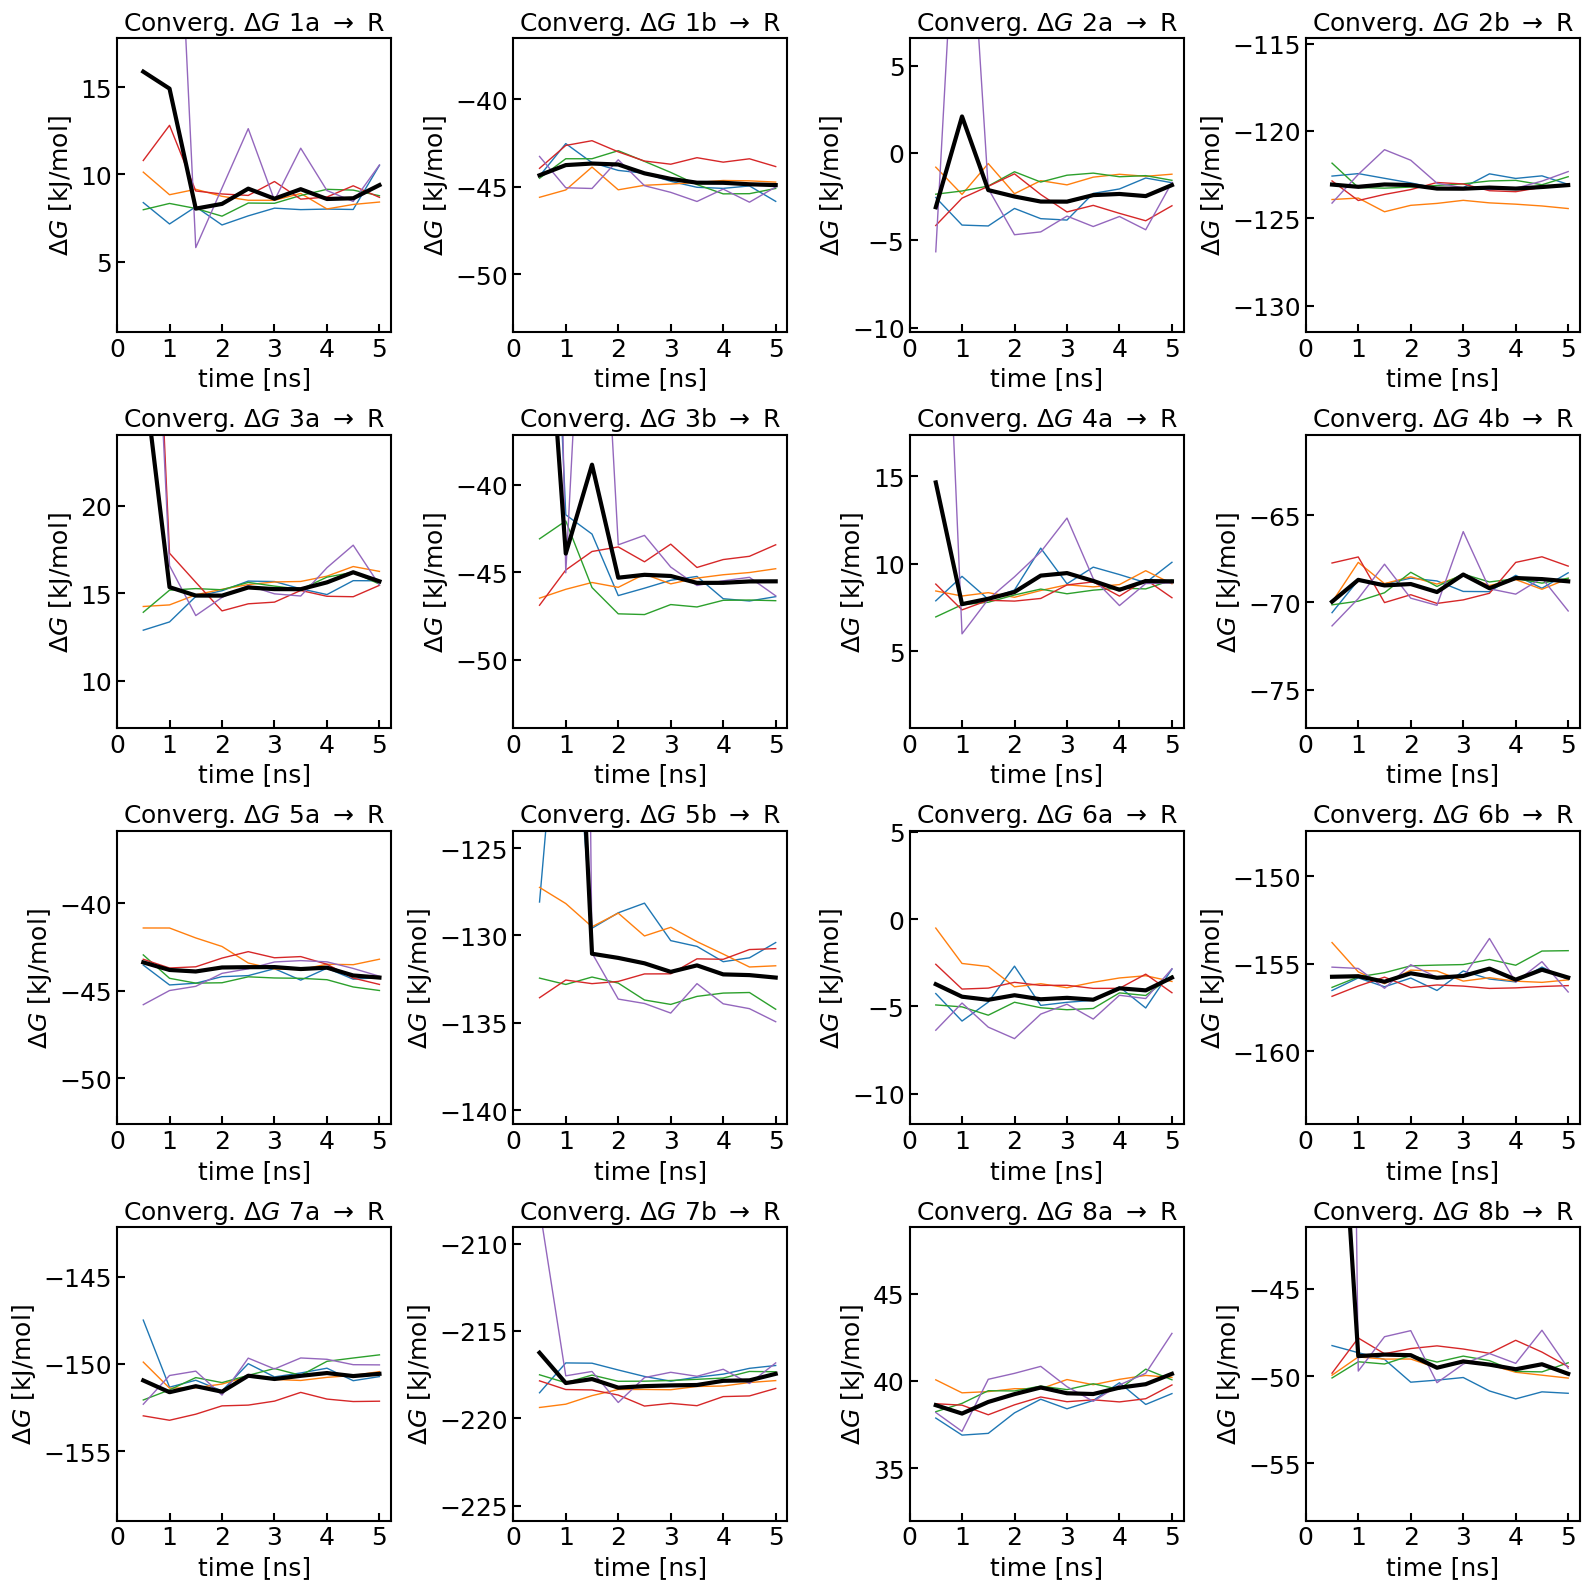

In [60]:
%matplotlib inline 
fig = plot_mbar_convergence(time, convergence_data, 16, state_labels, GSKcomplex=False)
fig.savefig('/home/cchampion/Desktop/fxa_conv_compl.pdf', bbox_inches="tight", dpi=100)

### Load data for GSK3b in complex

In [61]:
time = np.linspace(1, 10, 10)

convergence_data = np.zeros([5, 10, 16])
final_data = np.zeros([5, 16])

state_labels = ['9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', '13a', '13b', '14a', '14b', '15a', '15b', '16a', '16b']
out_dir = '../data/GSK3b/complex'
for i in range(5):
    convergence_data[i]=np.load(f'{out_dir}/deltaGs_convergence_seed{i+1}.npy')

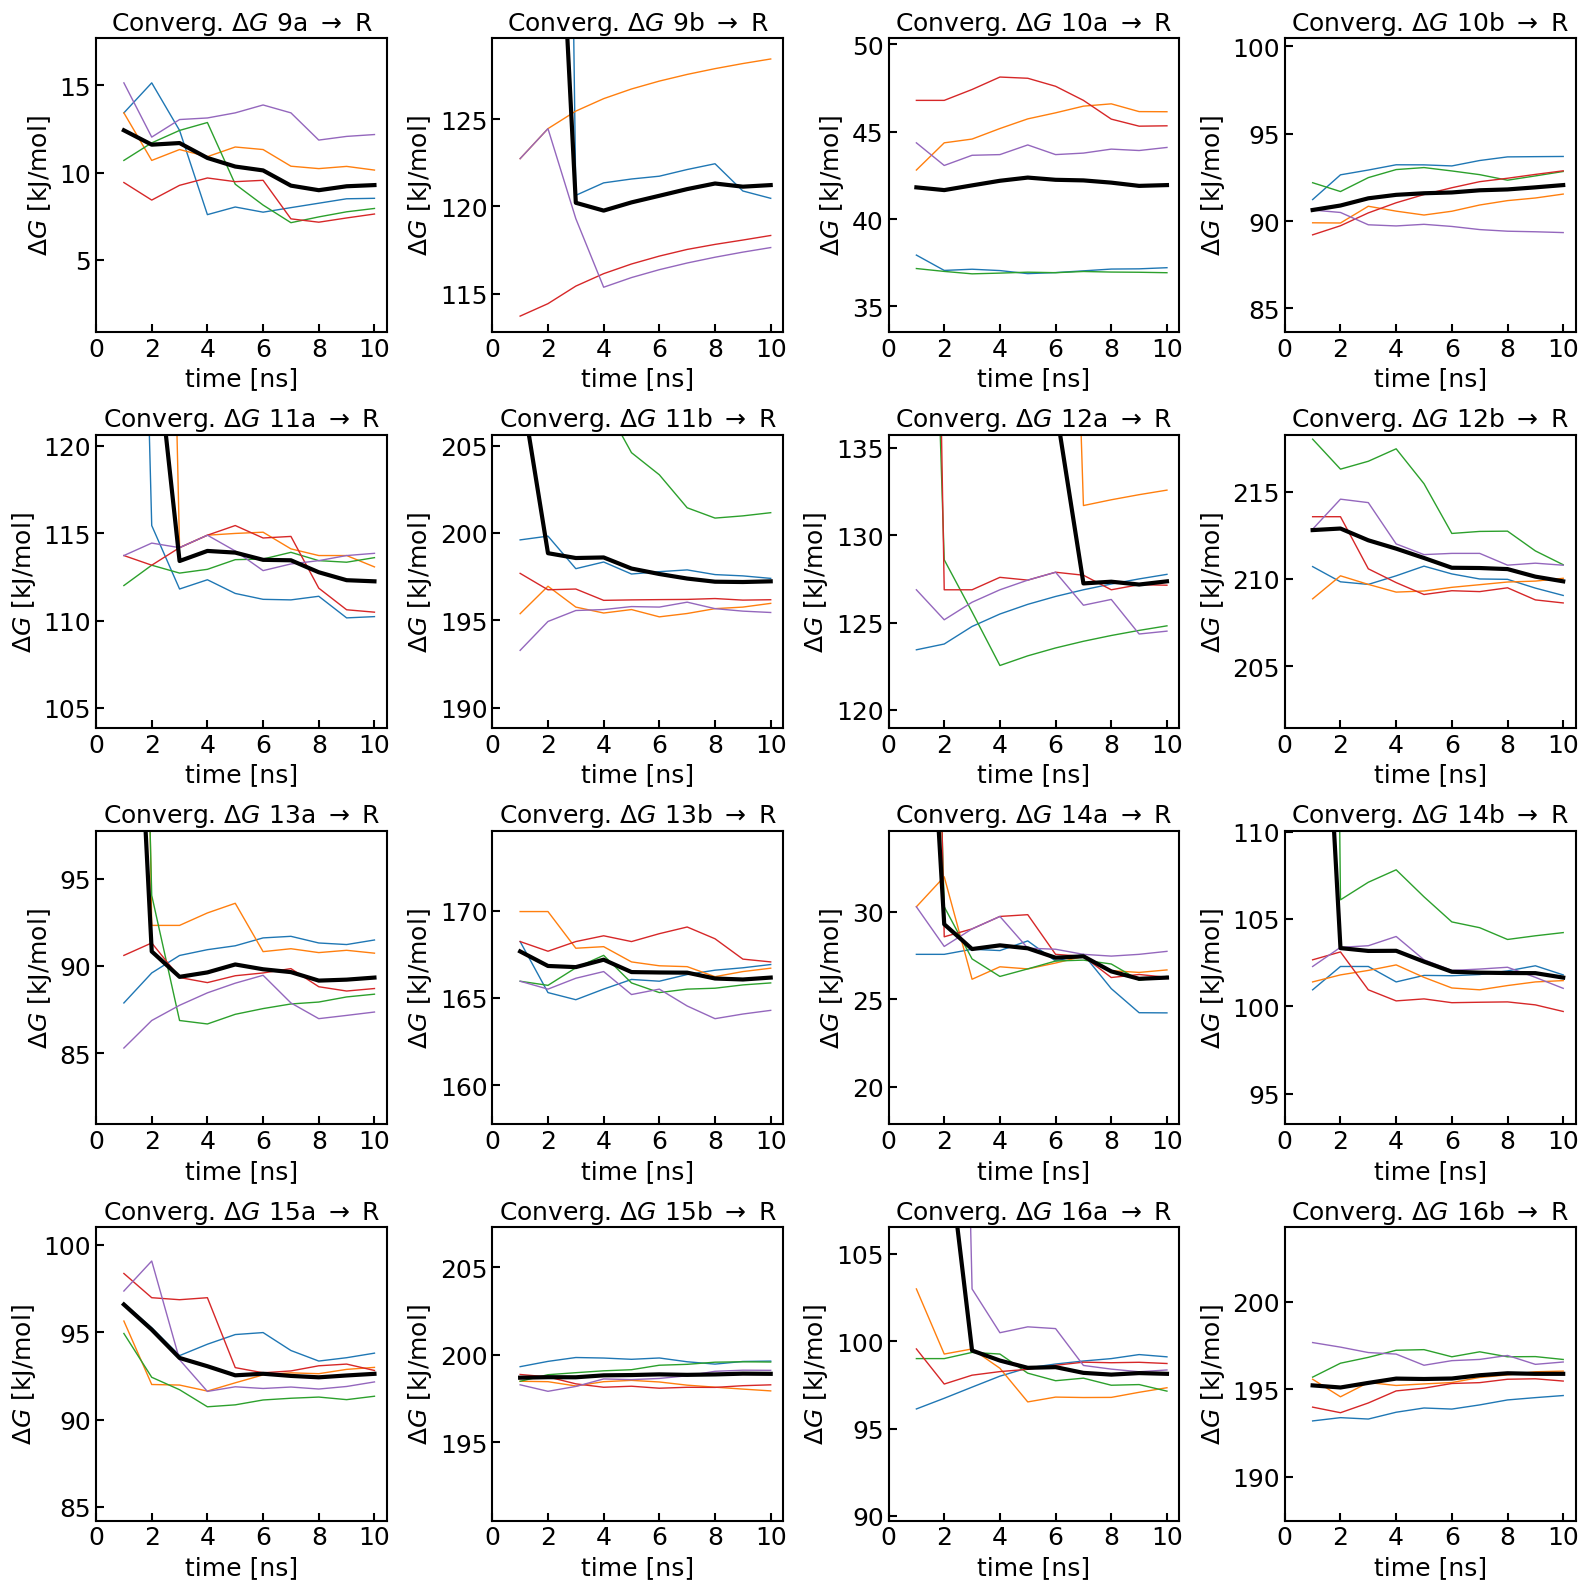

In [62]:
%matplotlib inline 
fig = plot_mbar_convergence(time, convergence_data, 16, state_labels, GSKcomplex=True)
fig.savefig('/home/cchampion/Desktop/gsk_conv_compl.pdf', bbox_inches="tight", dpi=100)